In [18]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("../Data/ExpressEntry.csv")
display(df.head(1))
# display(df.info())

,drawNumber,drawDate,drawName,drawSize,drawCRS,drawText2,drawDateTime,drawCutOff,drawDistributionAsOn,dd1,...,dd9,dd10,dd11,dd12,dd13,dd14,dd15,dd16,dd17,dd18
0,360,2025-08-08,French language proficiency (Version 1),"2,500",481,"Federal Skilled Worker Program, Canadian Exper...","August 08, 2025 at 15:36:25 UTC","July 18, 2025 at 05:16:06 UTC","August 5, 2025",228,...,"73,839","15,201","16,142","14,652","14,456","13,388","53,590","20,534","8,225","256,585"


In [ ]:
# display the missing values of drawCutOff
missing_draw_cutoff = df[df['drawCutOff'].isnull()]
print(len(missing_draw_cutoff), "missing drawCutOff values to keep in mind")
# display(missing_draw_cutoff)    

76 missing drawCutOff values


In [26]:
df['drawDate'] = pd.to_datetime(df['drawDate'])
# df['drawNumber'] = df['drawNumber'].astype(int) There is a problem with the conversion 
# because there is a 91a and a 91b draw Numbers 
# print(df.info())

In [ ]:
print(df.describe())
print(df['drawName'].value_counts())  # draw type frequency

           drawSize     drawCRS
count    361.000000  361.000000
mean    2372.238227  530.069252
std     2117.833776  134.329686
min      118.000000   75.000000
25%      763.000000  445.000000
50%     1804.000000  475.000000
75%     3600.000000  561.000000
max    27332.000000  902.000000
No Program Specified                                      167
Provincial Nominee Program                                 85
Canadian Experience Class                                  46
French language proficiency (Version 1)                    21
General                                                    11
Federal Skilled Trades                                      7
Healthcare occupations (Version 1)                          6
Trade occupations (Version 1)                               4
Healthcare and social services occupations (Version 2)      3
STEM occupations (Version 1)                                3
Transport occupations (Version 1)                           3
Agriculture and agri-food occu

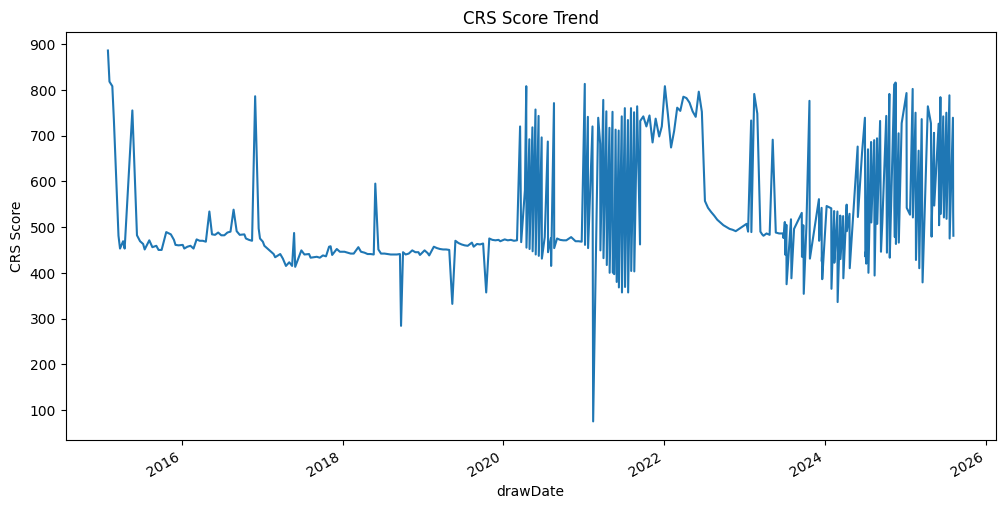

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # width=12, height=6 inches
df.groupby('drawDate')['drawCRS'].mean().plot(marker='')
plt.title('CRS Score Trend')
plt.ylabel('CRS Score')
plt.show()


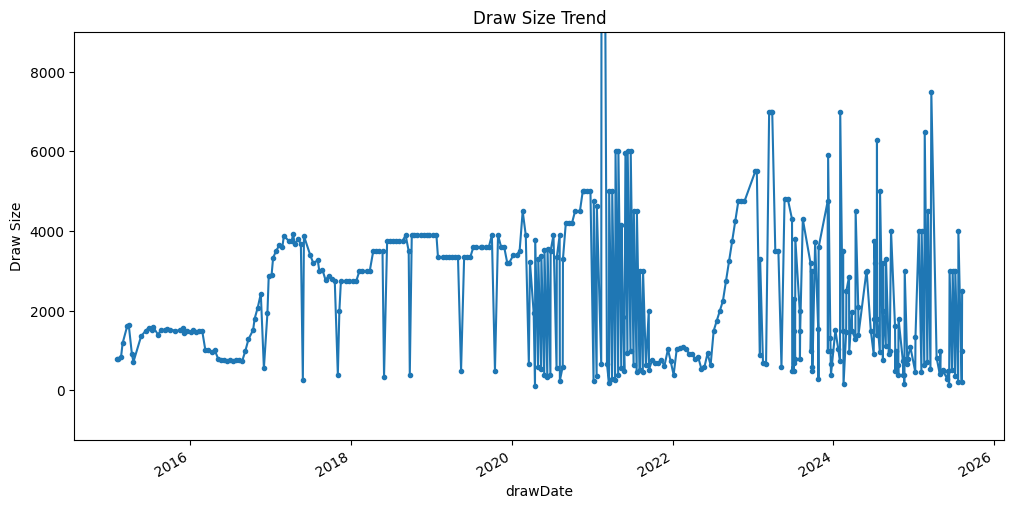

In [45]:
plt.figure(figsize=(12, 6))  # width=12, height=6 inches

df.groupby('drawDate')['drawSize'].mean().plot(marker='.')
plt.title('Draw Size Trend')
plt.ylabel('Draw Size')
plt.ylim(top=9000)  # set the top limit
plt.show()

In [ ]:
# Means of Scores per program
df.groupby('drawName')['drawCRS'].mean().sort_values()

drawName
Federal Skilled Trades                                    302.285714
Agriculture and agri-food occupations (Version 1)         392.333333
Trade occupations (Version 1)                             420.500000
French language proficiency (Version 1)                   424.857143
Transport occupations (Version 1)                         433.333333
Healthcare occupations (Version 1)                        450.000000
Canadian Experience Class                                 464.369565
No Program Specified                                      474.425150
Education occupations (Version 1)                         479.000000
STEM occupations (Version 1)                              486.000000
Federal Skilled Worker                                    489.000000
Healthcare and social services occupations (Version 2)    496.333333
General                                                   539.000000
Provincial Nominee Program                                741.458824
Name: drawCRS, dtype: flo

In [ ]:
# Total Number of historical invitations per program
df.groupby('drawName')['drawSize'].sum().sort_values()

drawName
Education occupations (Version 1)                           1000
Agriculture and agri-food occupations (Version 1)           1150
Transport occupations (Version 1)                           2645
Federal Skilled Trades                                      3055
Federal Skilled Worker                                      3300
Healthcare and social services occupations (Version 2)      5000
Trade occupations (Version 1)                               6100
STEM occupations (Version 1)                               10900
Healthcare occupations (Version 1)                         15850
General                                                    20520
French language proficiency (Version 1)                    52700
Provincial Nominee Program                                 57494
Canadian Experience Class                                 181067
No Program Specified                                      495597
Name: drawSize, dtype: int32

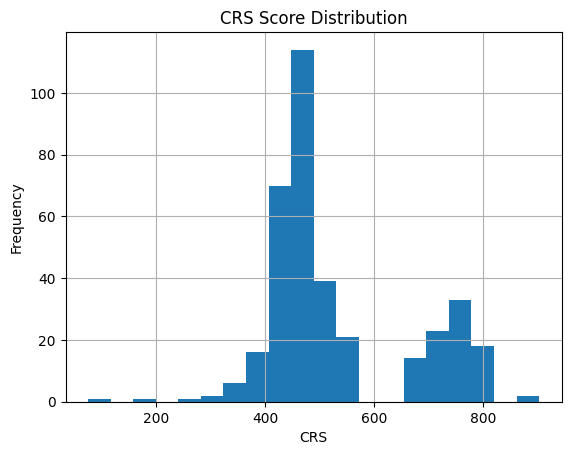

In [46]:
df['drawCRS'].hist(bins=20)
plt.title('CRS Score Distribution')
plt.xlabel('CRS')
plt.ylabel('Frequency')
plt.show()

In [47]:
recent = df[df['drawDate'] >= '2025-01-01']
past = df[df['drawDate'] < '2025-01-01']

print(recent['drawCRS'].mean(), past['drawCRS'].mean())

612.6333333333333 522.5861027190332


In [48]:
df.groupby('drawName').agg({'drawCRS': ['mean', 'min', 'max'], 'drawSize': 'sum'})


drawCRS            \
                                                          mean  min  max   
drawName                                                                   
Agriculture and agri-food occupations (Version 1)   392.333333  354  437   
Canadian Experience Class                           464.369565   75  808   
Education occupations (Version 1)                   479.000000  479  479   
Federal Skilled Trades                              302.285714  199  415   
Federal Skilled Worker                              489.000000  489  489   
French language proficiency (Version 1)             424.857143  336  486   
General                                             539.000000  524  561   
Healthcare and social services occupations (Ver...  496.333333  475  510   
Healthcare occupations (Version 1)                  450.000000  422  476   
No Program Specified                                474.425150  413  886   
Provincial Nominee Program                          741.458824  663  902   
STEM occupations (Version 1)                        486.000000  481  491   
Trade occupations (Version 1)                       420.500000  388  436   
Transport occupations (Version 1)                   433.333333  430  435   

                                                   drawSize  
                                                        sum  
drawName                                                     
Agriculture and agri-food occupations (Version 1)      1150  
Canadian Experience Class                            181067  
Education occupations (Version 1)                      1000  
Federal Skilled Trades                                 3055  
Federal Skilled Worker                                 3300  
French language proficiency (Version 1)               52700  
General                                               20520  
Healthcare and social services occupations (Ver...     5000  
Healthcare occupations (Version 1)                    15850  
No Program Specified                                 495597  
Provincial Nominee Program                            57494  
STEM occupations (Version 1)                          10900  
Trade occupations (Version 1)                          6100  
Transport occupations (Version 1)                      2645